In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_1r1i as method
import plot_utils

In [2]:
fname = method.__file__.split('/')[-1][:-3]
fname

'n_1r1i'

In [3]:
import rate
rate.setkey(1)

In [4]:
source = annotate.get_clean()
source.rename(columns={'Question_ja': 'Question'}, inplace=True)

In [5]:
test = source[:4]
test

,Participant #,Test_Date,Question id,Question_en,Answer,Novelty,Feasibility,Value,W_Novelty,L_Novelty,...,NG_FEASIBILITY,NG_VALUE,English,Question,sample_for_novelty,sample_for_feasibility,sample_for_value,novelty_transformed,feasibility_transformed,value_transformed
0,10,2021-12-23T04:04:27,0,Brick,粉砕,1591,1609,1559,7,8,...,0,5,Brick,レンガ,False,False,False,52,52,33
3,10,2021-12-23T04:04:27,3,Rubber band,溶解,1608,1584,1607,9,8,...,0,7,Rubber band,輪ゴム,False,False,False,58,43,56
4,10,2021-12-23T04:04:27,4,Newspaper,包装,1552,1648,1583,6,12,...,1,4,Newspaper,新聞,False,False,False,37,67,44
7,10,2021-12-23T04:04:27,7,Slippers,手袋,1586,1574,1623,7,9,...,0,6,Slippers,スリッパ,False,False,False,50,39,63


In [6]:
await method.rate(test)

Request 1 of 12
Request 2 of 12
Request 3 of 12
Request 4 of 12
Request 5 of 12
Request 6 of 12
Request 7 of 12
Request 8 of 12
Request 9 of 12
Request 10 of 12
Request 11 of 12
Request 12 of 12


In [7]:
for i, row in test.iterrows():
    for measure in ('novelty', 'feasibility', 'value'):
        print(row[f'{measure}_idea_explanation'])
    print()

The idea is to use a brick ("レンガ" in Japanese) as a tool for crushing or grinding ("粉砕" in Japanese).
The idea is to use a brick ("レンガ" in Japanese) as a pulverizer ("粉砕" in Japanese).
The idea is to use bricks ("レンガ") as a crushing or grinding tool ("粉砕").

The idea is to use a rubber band, or "輪ゴム" in Japanese, as a means of "溶解" or dissolving.
The idea is to use "輪ゴム" (rubber bands) as "溶解" (dissolving agent).
The idea is to use a rubber band ("輪ゴム") as a dissolving agent ("溶解").

The idea is to use a newspaper ("新聞" in Japanese) as wrapping paper ("包装" in Japanese).
The idea is to use newspapers ("新聞" in Japanese) as packaging material ("包装" in Japanese).
The idea is to use newspapers ("新聞") as wrapping material ("包装").

The idea is to use "スリッパ" (slippers) as "手袋" (gloves).
The idea is to use "スリッパ" (slippers) as "手袋" (gloves).
The idea is to use slippers, typically worn on the feet, as gloves for the hands.



In [8]:
await method.rate(source)

Request 1 of 3666
Request 2 of 3666
Request 3 of 3666
Request 4 of 3666
Request 5 of 3666
Request 6 of 3666
Request 7 of 3666
Request 8 of 3666
Request 9 of 3666
Request 10 of 3666
Request 11 of 3666
Request 12 of 3666
Request 13 of 3666
Request 14 of 3666
Request 15 of 3666
Request 16 of 3666
Request 17 of 3666
Request 18 of 3666
Request 19 of 3666
Request 20 of 3666
Request 21 of 3666
Request 22 of 3666
Request 23 of 3666
Request 24 of 3666
Request 25 of 3666
Request 26 of 3666
Request 27 of 3666
Request 28 of 3666
Request 29 of 3666
Request 30 of 3666
Request 31 of 3666
Request 32 of 3666
Request 33 of 3666
Request 34 of 3666
Request 35 of 3666
Request 36 of 3666
Request 37 of 3666
Request 38 of 3666
Request 39 of 3666
Request 40 of 3666
Request 41 of 3666
Request 42 of 3666
Request 43 of 3666
Request 44 of 3666
Request 45 of 3666
Request 46 of 3666
Request 47 of 3666
Request 48 of 3666
Request 49 of 3666
Request 50 of 3666
Request 51 of 3666
Request 52 of 3666
Request 53 of 3666
Re

In [9]:
source.to_excel(f'gpt-ratings/{fname}.xlsx')

In [3]:
source = pd.read_excel(f'gpt-ratings/{fname}.xlsx')

In [5]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.5455995600846638, pvalue=1.0180218520878363e-95),
 'feasibility': SignificanceResult(statistic=0.6539764175153063, pvalue=5.011775936380971e-150),
 'value': SignificanceResult(statistic=0.22566734854348544, pvalue=1.4188274472885858e-15)}

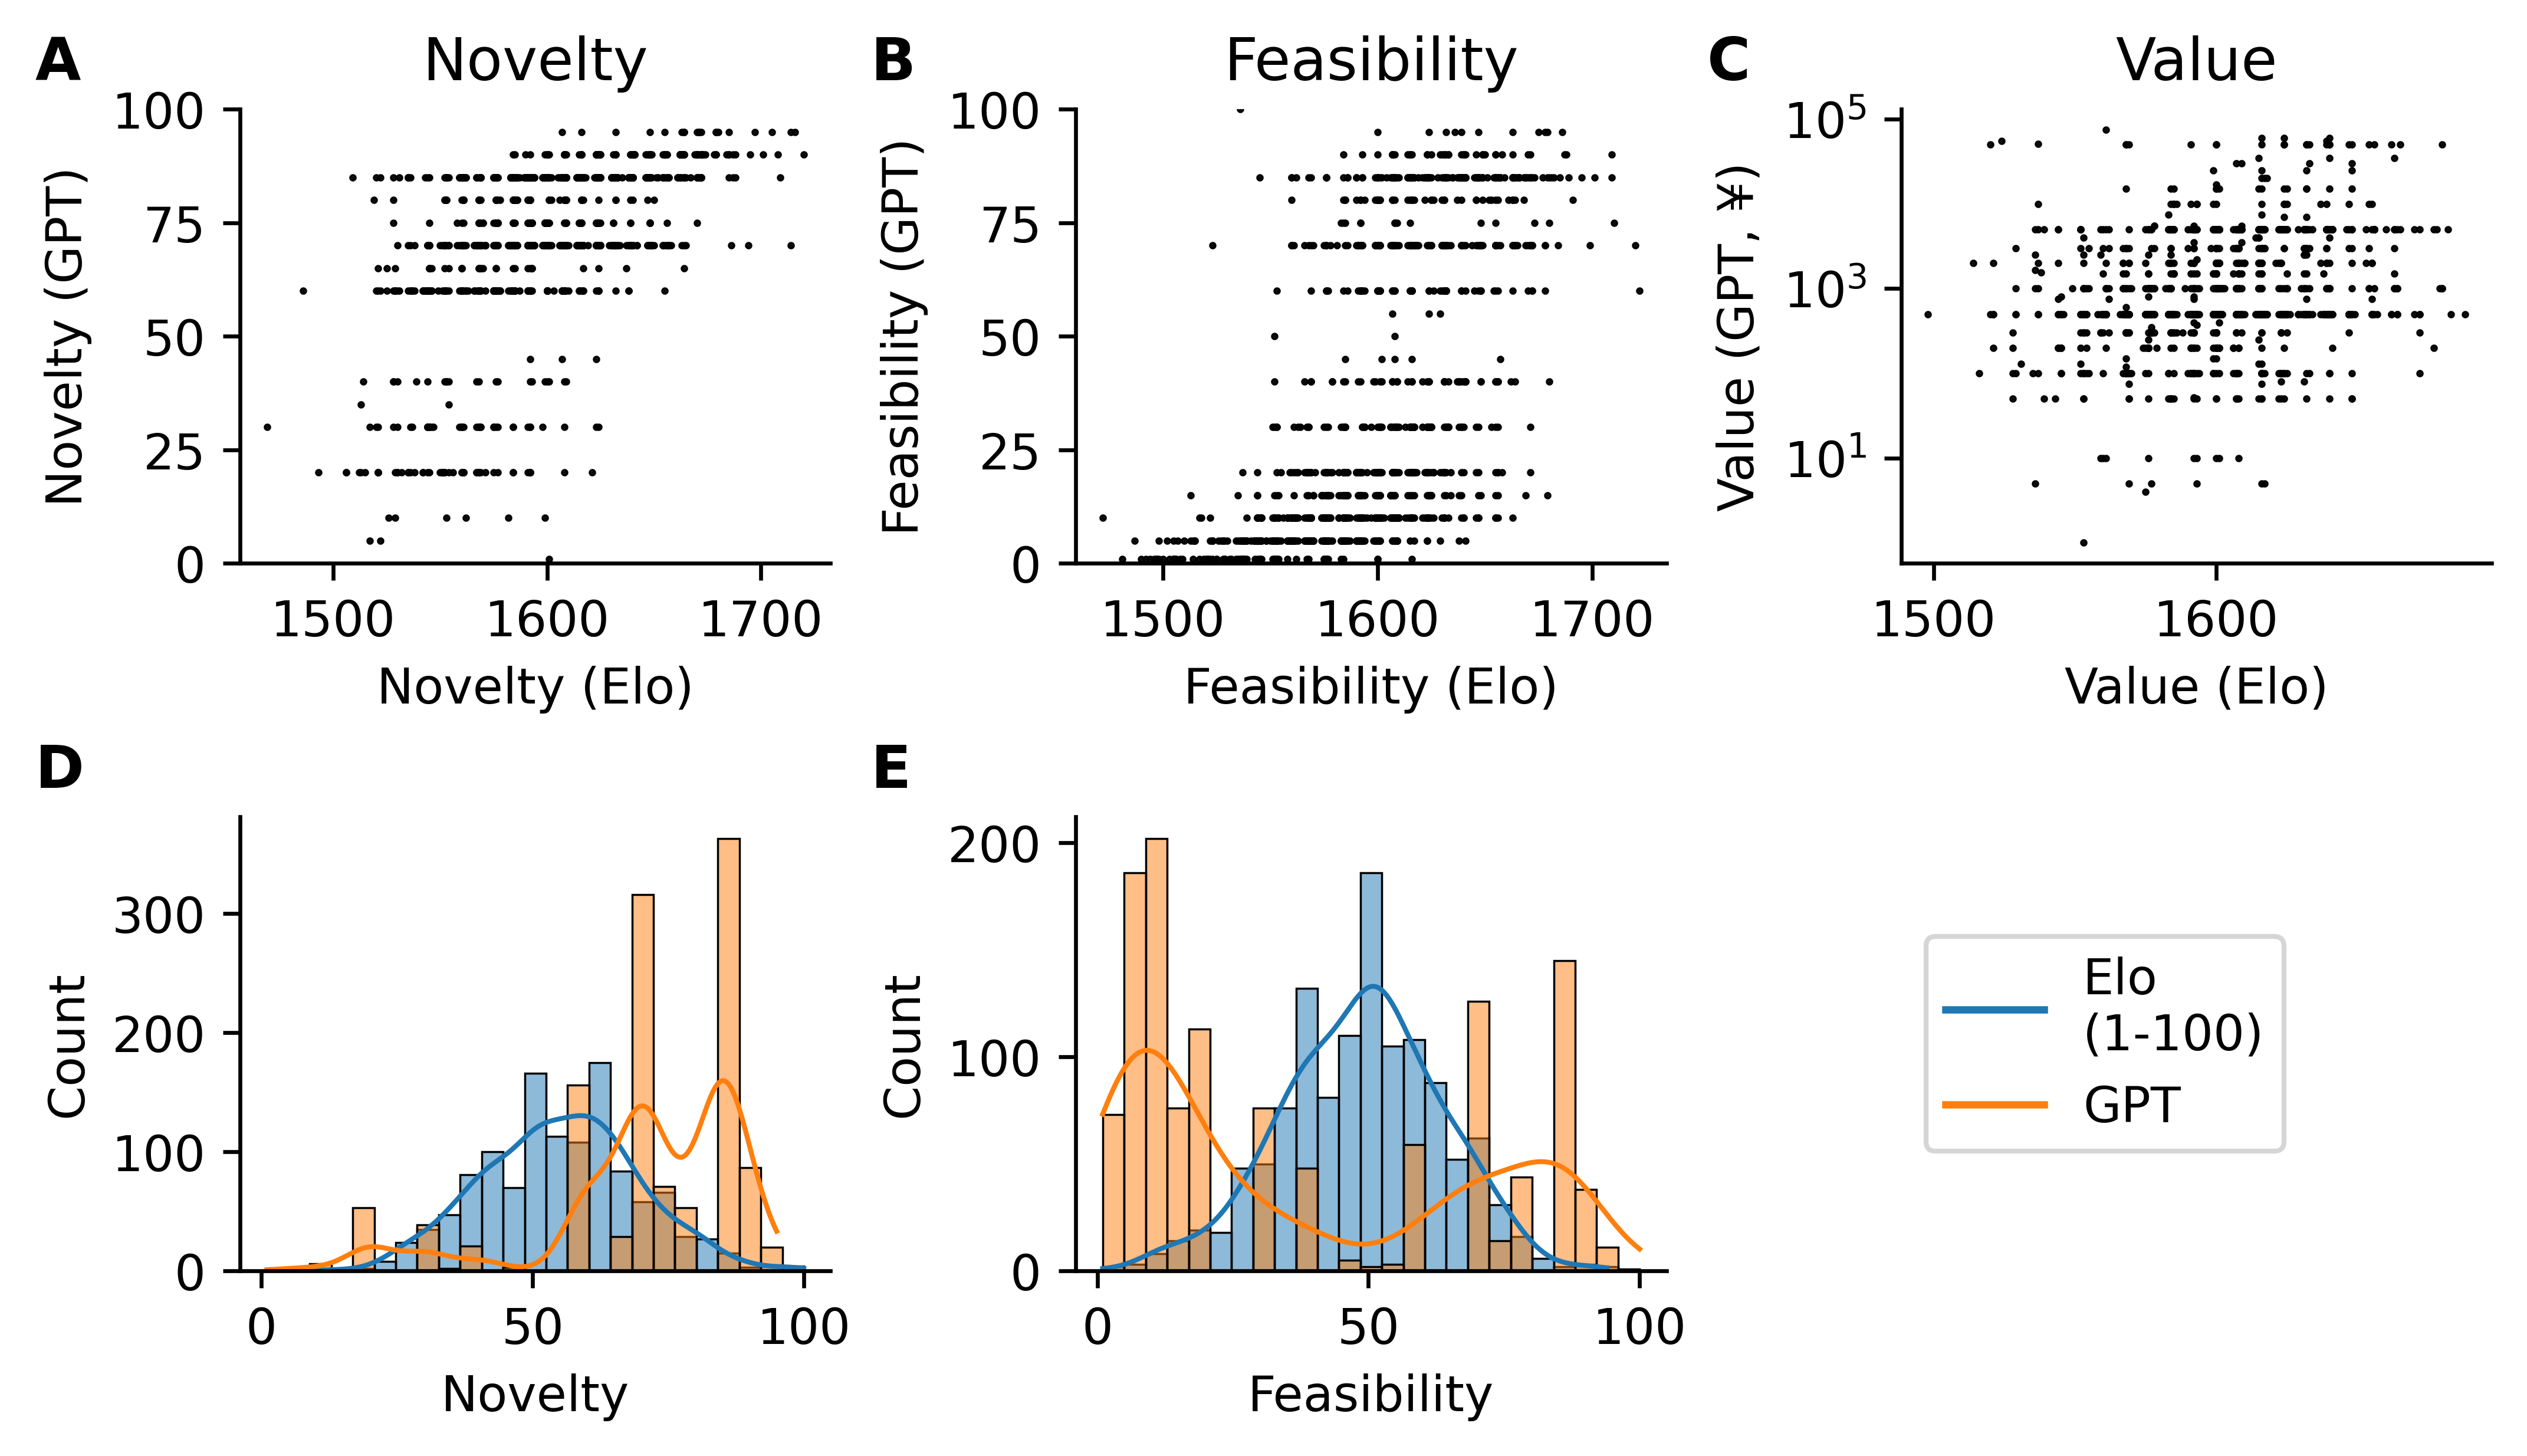

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (GPT{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='GPT')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

plt.savefig(f'Figure_2.{fname}.pdf')

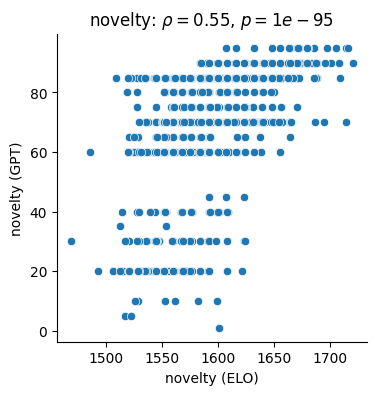

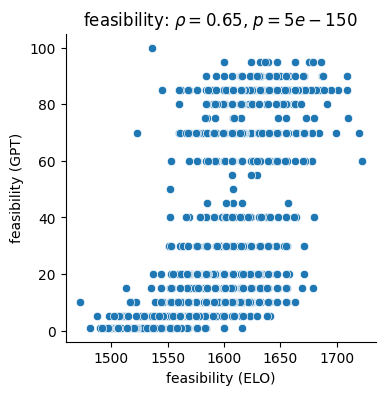

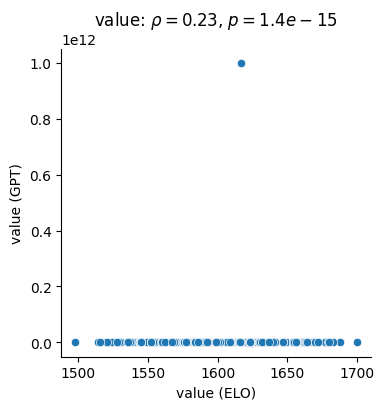

In [12]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (GPT)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

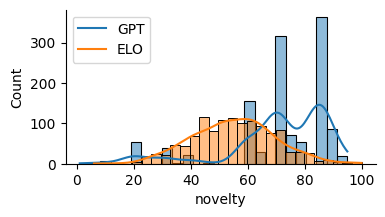

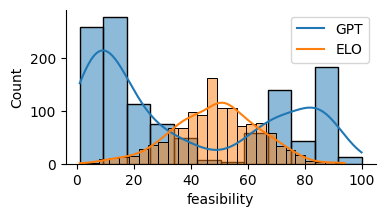

In [23]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='GPT')
    plt.plot([], label='ELO')
    plt.legend()

In [13]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

新聞
ぞうきん
In Japan, newspapers are often recycled or discarded after reading, while dust cloths are commonly used household items. A typical dust cloth in Japan can range from 100 yen to 1,000 yen depending on the material and quality. However, using a newspaper as a dust cloth could potentially save this cost. On the other hand, the cost of a newspaper varies depending on the publication, but it's typically around 130 yen per issue for a daily newspaper. Therefore, the potential commercial value of this idea could be seen as the cost saving from not buying a dust cloth, minus the cost of the newspaper.

クレジットカード
不正利用
This is a highly illegal and unethical idea. In the real world, the value of such an idea is negative, as it can lead to severe penalties, including fines and imprisonment. The cost of credit card fraud to businesses and individuals is enormous, running into billions of yen annually. However, it's important to note that this cost is not a value but a detriment to society.



In [14]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['value_idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

コルク
住居
10000000
The idea is to use "corks" as "dwellings".
In the current market, the concept of using corks as dwellings is not prevalent. However, if we consider the closest equivalent, it would be tiny homes or compact living spaces. These are becoming increasingly popular, especially in urban areas where space is a premium. The cost of these tiny homes can vary greatly depending on the size, location, and amenities, but on average, they can range from a few million to tens of millions of yen.

テープ
反射材
2000000000
The idea is to use "tape" as a "reflective material".
Reflective materials are widely used in various fields such as safety clothing, road signs, and automotive parts. The market size of reflective materials in Japan is not publicly disclosed, but the global market size is expected to reach 3.7 billion USD by 2025. If we assume that Japan accounts for 10% of the global market, the market size in Japan would be approximately 370 million USD, or about 40 billion JPY. However,

Text(0.5, 1.0, 'value: $\\rho = 0.23$, $p = 8.7e-15$')

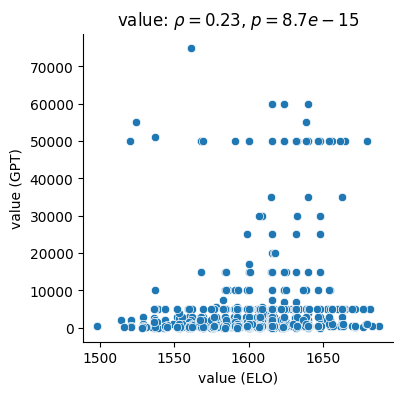

In [15]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (GPT)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [18]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['novelty_raw'].item())

The idea is to use a ballpoint pen ("ボールペン") as a refrigerator ("冷蔵庫"). 

In comparison to other unconventional uses of a ballpoint pen, such as using it as a hairpin, a makeshift ruler, or a tool to reset electronic devices, the idea of using it as a refrigerator is highly unique. It's not immediately clear how a pen could function as a refrigerator, which adds to the novelty of the idea. However, it's worth noting that the novelty of an idea doesn't necessarily correlate with its feasibility or practicality.

{"novelty": 95}


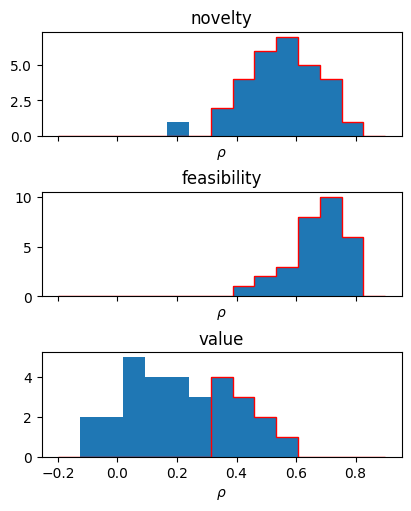

In [4]:
fig, axs = plt.subplots(3, figsize=(4,5), sharex=True, layout='constrained')
for ax, key in zip(axs, annotate.measures):
    vcorr = []
    for qid in source['Question id'].unique():
        vcorr.append(stats.spearmanr(source[source['Question id']==qid][[key.capitalize(), key]]))
    
    ax.set_title(key)
    ax.hist([c.statistic for c in vcorr], range=(-.2,.9), bins=15)
    ax.hist([c.statistic for c in vcorr if c.pvalue < 0.05], range=(-.2,.9), bins=15, histtype='step', color='r')
    ax.set_xlabel('$\\rho$')
    # plt.ylabel('p');

(8.322422258592471, 6.76759410801964)

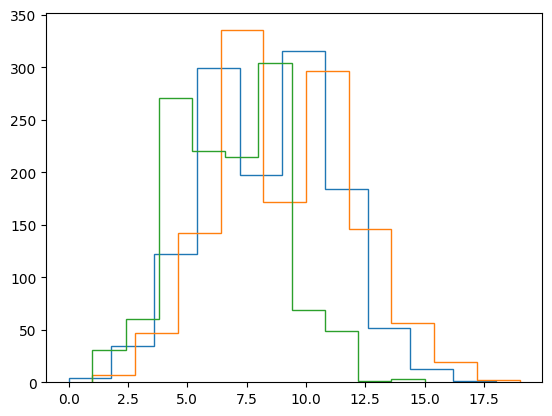

In [5]:
plt.hist(source['L_Novelty'], histtype='step')
plt.hist(source['L_Feasibility'], histtype='step')
plt.hist(source['L_Value'], histtype='step');
source['L_Feasibility'].median(), source['W_Feasibility'].median()
source['W_Novelty'].mean(), source['W_Value'].mean()